In [1]:
import pandas as pd
import numpy as np

# For data visualization
import seaborn as sns
import textnets as tn
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# For NLP(text cleaning)
import nltk
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# For NLP(feature extraction)
from sklearn.feature_extraction.text import TfidfVectorizer

# For dimension reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

# For clustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN, AgglomerativeClustering

# For file handeling operations
import os
from glob import glob
from tqdm import tqdm

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
abs_filepath = glob(r'../tochora/baba/BBC news Summary/News Articles/*/*.txt')
news_articles = []
for abs_filepath in tqdm(abs_filepath):
    try:
        f = open(abs_filepath, 'r').read().lower()
        #new_article = f.read().decode(encoding='utf-8').lower()
        news_articles.append(str(f))
    except:
        f = open(abs_filepath, 'rb').read().lower()
        #new_article = f.read().decode(encoding='utf-8').lower()
        news_articles.append(str(f))



100%|██████████| 1839/1839 [00:10<00:00, 177.57it/s]


In [3]:
news_articles[0]

'ad sales boost time warner profit\n\nquarterly profits at us media giant timewarner jumped 76% to $1.13bn (â£600m) for the three months to december, from $639m year-earlier.\n\nthe firm, which is now one of the biggest investors in google, benefited from sales of high-speed internet connections and higher advert sales. timewarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. its profits were buoyed by one-off gains which offset a profit dip at warner bros, and less users for aol.\n\ntime warner said on friday that it now owns 8% of search-engine google. but its own internet business, aol, had has mixed fortunes. it lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. however, the company said aol\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to si

In [5]:
ps = PorterStemmer()
clean_articles = []
for article in tqdm(news_articles):
    article = article.replace("\\n", '')
    article = re.sub("^[a-zA-Z]", " ", article)
    words = article.split()
    clean_article = [ps.stem(word) for word in words if not word in stopwords.words('english')]
    clean_article = " ".join(clean_article)
    clean_articles.append(clean_article)

100%|██████████| 1839/1839 [06:54<00:00,  4.44it/s]


In [6]:
clean_articles[0]

'sale boost time warner profit quarterli profit us media giant timewarn jump 76% $1.13bn (â£600m) three month december, $639m year-earlier. firm, one biggest investor google, benefit sale high-spe internet connect higher advert sales. timewarn said fourth quarter sale rose 2% $11.1bn $10.9bn. profit buoy one-off gain offset profit dip warner bros, less user aol. time warner said friday own 8% search-engin google. internet business, aol, mix fortunes. lost 464,000 subscrib fourth quarter profit lower preced three quarters. however, compani said aol\' underli profit except item rose 8% back stronger internet advertis revenues. hope increas subscrib offer onlin servic free timewarn internet custom tri sign aol\' exist custom high-spe broadband. timewarn also restat 2000 2003 result follow probe us secur exchang commiss (sec), close concluding. time warner\' fourth quarter profit slightli better analysts\' expectations. film divis saw profit slump 27% $284m, help box-offic flop alexand cat

In [7]:
tfidf = TfidfVectorizer()
article_vectors = tfidf.fit_transform(clean_articles)

In [8]:
article_vectors

<1839x24390 sparse matrix of type '<class 'numpy.float64'>'
	with 300169 stored elements in Compressed Sparse Row format>

In [9]:
svd = TruncatedSVD()
reduced_articles = svd.fit_transform(article_vectors)

In [12]:

ssd = []
for k in tqdm(range(2, 10)):
    km = KMeans(n_clusters=k)
    km = km.fit(reduced_articles)
    ssd.append(km.inertia_)

100%|██████████| 8/8 [00:02<00:00,  3.98it/s]


Text(0, 0.5, 'ssd')

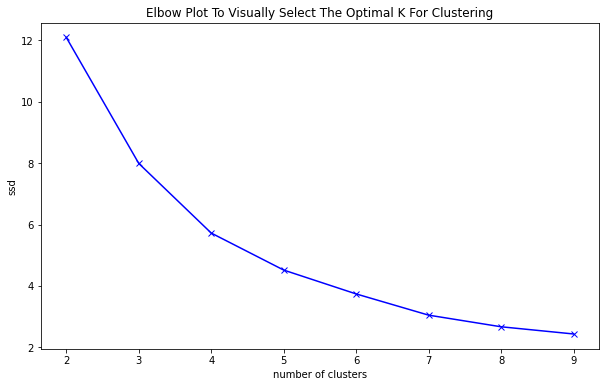

In [14]:
plt.figure(figsize=(10, 6))
plt.title("Elbow Plot To Visually Select The Optimal K For Clustering")
plt.plot(range(2, 10), ssd, 'bx-')
plt.xlabel("number of clusters")
plt.ylabel('ssd')

In [16]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(reduced_articles)
labels = kmeans.labels_

In [23]:
df_dict = {"news": news_articles, 'labels_km': labels}
df = pd.DataFrame(df_dict)
df.head()

,news,labels_km
0,ad sales boost time warner profit\n\nquarterly...,0
1,dollar gains on greenspan speech\n\nthe dollar...,3
2,yukos unit buyer faces loan claim\n\nthe owner...,3
3,high fuel prices hit ba's profits\n\nbritish a...,3
4,pernod takeover talk lifts domecq\n\nshares in...,0


In [24]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(reduced_articles)
tsne_df = pd.DataFrame(tsne_data, columns=['comp1', 'comp2'])
tsne_df.head()

,comp1,comp2
0,14.708163,-6.650931
1,-16.998432,-22.061811
2,-6.958668,23.862417
3,3.487325,8.023940
4,22.989836,37.315628


In [29]:
def tsne_viz(tsne_df, labels, label_cols='', ax = False):
    if not  ax:
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x=tsne_df['comp1'], y=tsne_df['comp2'], hue=labels, palette='rainbow')
        plt.show()
    else:
        ax.set_title(f"Visualising the clusters of {label_col} using TSNE")
        sns.scatterplot(x=tsne_df['comp1'], y=tsne_df['comp2'], hue=labels, palette='rainbow')


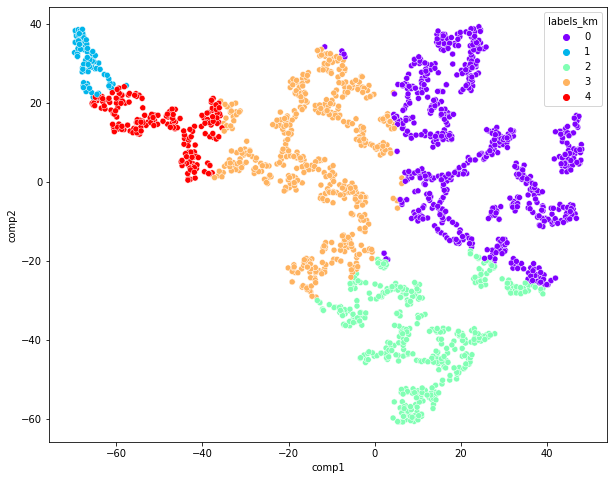

In [30]:
tsne_viz(tsne_df, df['labels_km'])